<a href="https://colab.research.google.com/github/barbroussard/Dickens3/blob/master/ITEC_600_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project for ITEC 600
## Building a fraud detector model and application


## Executive Summary

This project presents the full process of developing a Fraud Detection Model and its deployment through an interactive application. The primary aim of the project is to explore and evaluate advanced methodologies beyond traditional and publicly documented approaches like Logistic Regression and K-nearest Neighbors (KNN). Instead, this project assesses the performance of three other machine learning algorithms: Random Forest, Naive Bayes, and Gradient Boosting Machine (GBM). The project uses a large, simulated dataset of one million transactions provided by Kaggle, hence the desire to focus on methodologies other than ones publicly documented.


Fraud detection is a crucial task for financial institutions and retailers, and developing accurate models is essential to minimize losses due to fraudulent activities. While this project is purely theoretical and for educational purposes in nature, it aimed to be as realistic as possible in terms of its ability to evaluate the models used in this project based on their ability to accurately predict fraud and their precision and recall scores. The results revealed that Gradient Boosting Machine (GBM) outperformed the other models regarding predictive accuracy, precision, and recall, making it the most suitable candidate for the fraud detection app.


In addition to model development, the project includes the creation of an interactive fraud detection app built using Streamlit, an open-source Python framework. The app allows users to input transaction data and receive real-time predictions on whether a transaction is fraudulent or not. It also provides insights into how different factors influence fraud prediction on a case-by-case basis. This project not only demonstrates the effectiveness of GBM for fraud detection but also showcases the integration of machine learning models into user-friendly applications that can, theoretically, assist businesses in detecting fraud effectively.



## Introduction

Fraud detection is a critical challenge for banks, retailers, and customers who face financial and reputational risks from fraudulent transactions. Traditional models like logistic regression and k-nearest neighbors (KNN) are widely used due to their simplicity and ease of implementation. However, these methods often struggle with scalability and accuracy when applied to large datasets or imbalanced classes - common in fraud detection scenarios. For financial institutions, the ability to identify fraudulent transactions swiftly and accurately can mitigate losses and build customer trust, while for retailers, it safeguards their operational integrity and reputation.

In this project, we sought to develop a fraud detection model and application using alternative machine learning techniques, (Random Forests, Naive Bayes, and Gradient Boosting Machines (GBM)) to improve scalability and accuracy, when compared to traditional models and enable better detection of fraudulent transactions in real-world scenarios. Using a simulated dataset of over one million transactions, we evaluated the models based on performance metrics such as precision, recall, and F1-score.

This project aims to provide the first steps for a data-driven solution for organizations seeking to strengthen their fraud detection capabilities. By implementing and assessing advanced machine learning methods, we contribute to the ongoing effort to enhance the accuracy and reliability of fraud detection systems in the financial ecosystem.

## Data

### EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import Data and check for missing values

In [ ]:
# upload data set
data = pd.read_csv('/content/drive/MyDrive/Colab Projects/card_transdata.csv')

# calculate missing values that need to be addressed
missing_values = data.isna().sum()

# check for na values
if missing_values.any():
  print('There are some missing values here, you better work on that.')
else:
  print('Hooray, there are no missing values!')

Hooray, there are no missing values!


After importing our data, we can begin basic EDA

In [ ]:
### Basic EDA so we can get a sense of the Data Structure
# Prints top 20 rows
print(data.head(20))

# Gives Variable names and null counts
print(data.info())

#Gives Basic stats on the data, specifically: min, max, mean, and std
print(data.describe())


    distance_from_home  distance_from_last_transaction  \
0            57.877857                        0.311140   
1            10.829943                        0.175592   
2             5.091079                        0.805153   
3             2.247564                        5.600044   
4            44.190936                        0.566486   
5             5.586408                       13.261073   
6             3.724019                        0.956838   
7             4.848247                        0.320735   
8             0.876632                        2.503609   
9             8.839047                        2.970512   
10           14.263530                        0.158758   
11           13.592368                        0.240540   
12          765.282559                        0.371562   
13            2.131956                       56.372401   
14           13.955972                        0.271522   
15          179.665148                        0.120920   
16          11

After a descriptive EDA, It's always nice to have some Visual EDA

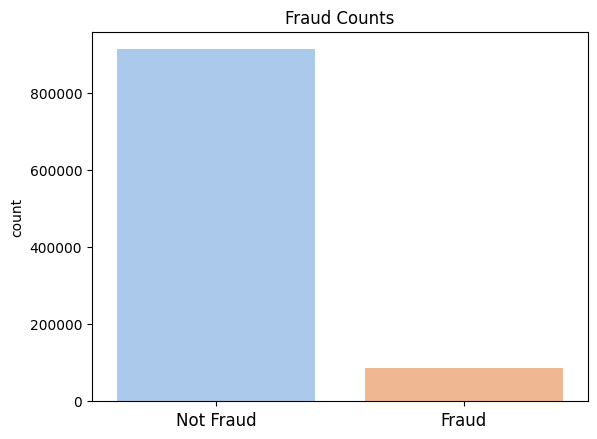

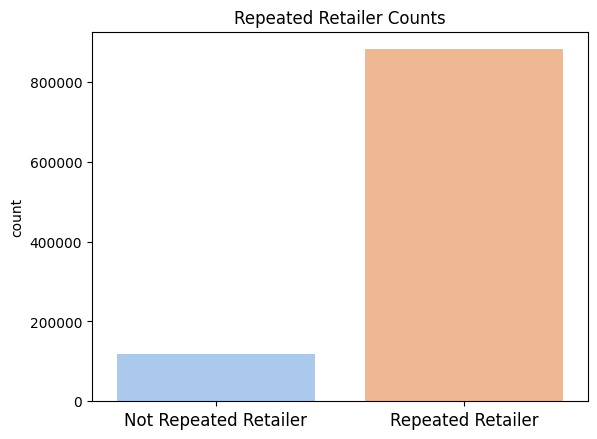

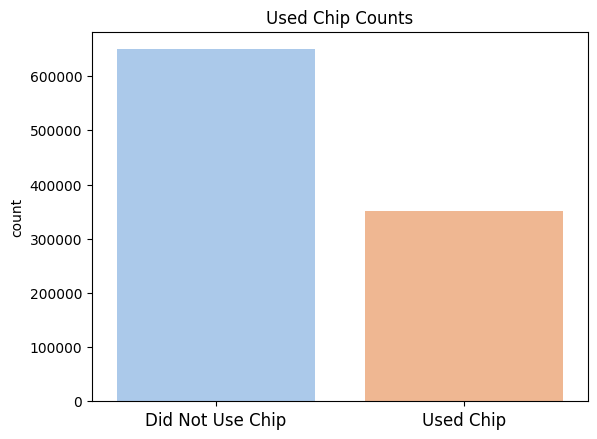

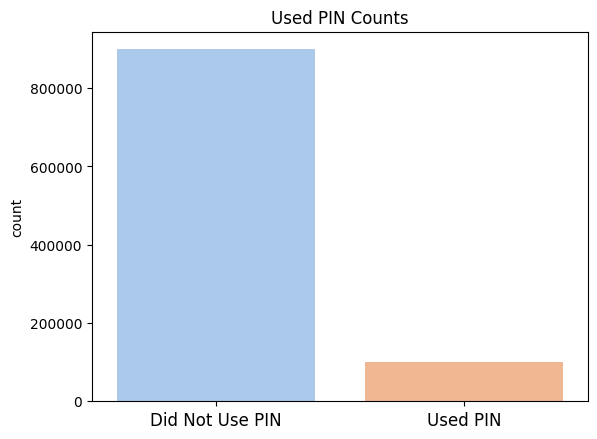

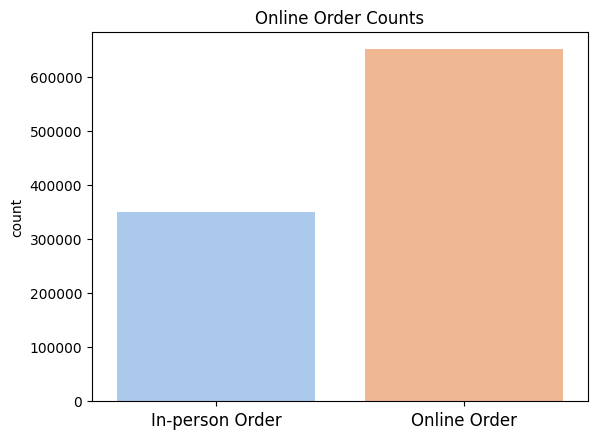

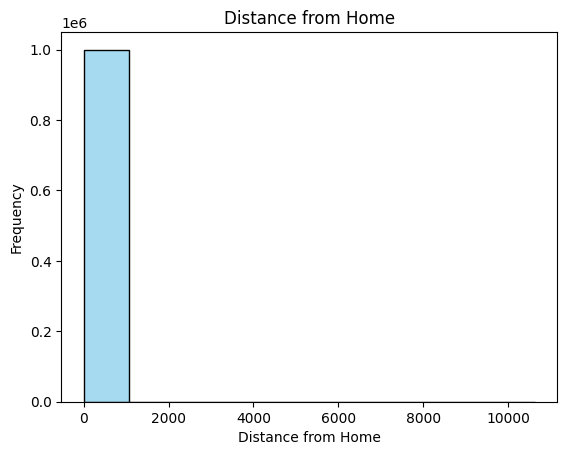

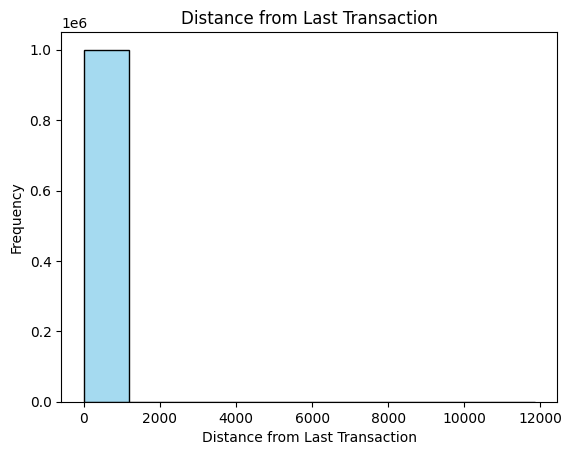

Text(0.5, 1.0, 'Ratio to Median Purchase Price')

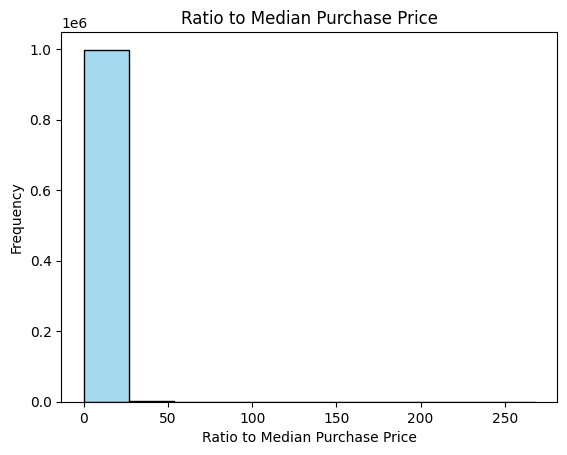

In [ ]:
### Visual EDA

# Our Y/Independant variable, Fraud
## 1 means there was a fraud, 0, means there was not
ax = sns.countplot(x='fraud', data=data, palette='pastel', hue='fraud', legend=False)
new_labels = ['Not Fraud', 'Fraud']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Fraud Counts')
plt.show()

# Our X Categorical Variables
ax = sns.countplot(x='repeat_retailer', data=data, palette='pastel', hue='repeat_retailer', legend=False)
new_labels = ['Not Repeated Retailer', 'Repeated Retailer']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Repeated Retailer Counts')
plt.show()

ax = sns.countplot(x='used_chip', data=data, palette='pastel', hue='used_chip', legend=False)
new_labels = ['Did Not Use Chip', 'Used Chip']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Used Chip Counts')
plt.show()

ax = sns.countplot(x='used_pin_number', data=data, palette='pastel', hue='used_pin_number', legend=False)
new_labels = ['Did Not Use PIN', 'Used PIN']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Used PIN Counts')
plt.show()

ax = sns.countplot(x='online_order', data=data, palette='pastel', hue='online_order', legend=False)
new_labels = ['In-person Order','Online Order']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Online Order Counts')
plt.show()


# Our X Continous Variables
sns.histplot(data['distance_from_home'], bins=10, kde=False, color='skyblue')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Distance from Home')
plt.show()

sns.histplot(data['distance_from_last_transaction'], bins=10, kde=False, color='skyblue')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Frequency')
plt.title('Distance from Last Transaction')
plt.show()

sns.histplot(data['ratio_to_median_purchase_price'], bins=10, kde=False, color='skyblue')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Frequency')
plt.title('Ratio to Median Purchase Price')




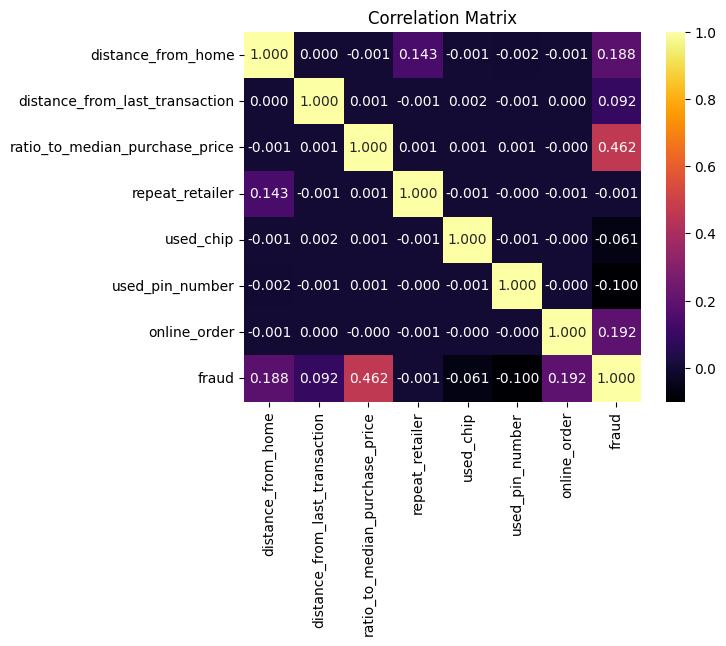

In [ ]:
# calculate correlation matrix
corr_matrix = data.corr()

# plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

After completing our EDA, we can begin model construction.

## Modeling

### Random Forest Model

Random Forest is an ensemble-based machine learning model that builds multiple decision trees on different subsets of the dataset and averages their predictions for classification or regression tasks. Its key advantages are its ability to handle high-dimensional data and resistance to overfitting due to averaging. However, it can be computationally intensive and lacks straightforward interpretability. Compared to traditional models such as logistic regression, Random Forest excels in capturing complex interactions among variables and performs well on large datasets.

In [ ]:
# import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# separate target variable column from data set
X = data.drop('fraud', axis=1)
y = data['fraud']
random_value = 42

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_value, stratify=y)

In [ ]:
# use random forest to build model
rfModel1 = RandomForestClassifier(n_estimators=100, random_state=random_value)
rfModel1.fit(X_train, y_train)

# make predictions
rf1_y_pred = rfModel1.predict(X_test)

In [ ]:
# test the model
rf1_accuracy = accuracy_score(y_test, rf1_y_pred)
rf1_precision = precision_score(y_test, rf1_y_pred)
rf1_recall = recall_score(y_test, rf1_y_pred)
rf1_f1 = f1_score(y_test, rf1_y_pred)
print(f'Accuracy: {rf1_accuracy}')
print(f'Precision: {rf1_precision}')
print(f'Recall: {rf1_recall}')
print(f'F1 Score: {rf1_f1}')
rf1_report = classification_report(y_test, rf1_y_pred)
print(rf1_report)

Accuracy: 0.9999833333333333
Precision: 1.0
Recall: 0.9998093131459517
F1 Score: 0.99990464748174
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



### Naive Bayes Model

Naive Bayes is a classification algorithm that applies Bayes’ theorem under the assumption of predictor independence. It is computationally efficient and well-suited for large datasets, particularly when feature independence holds true. Its limitations include poor performance with correlated predictors and difficulty handling continuous data effectively without preprocessing. Unlike logistic regression, which models relationships explicitly, Naive Bayes excels in scenarios with high-dimensional categorical data and imbalanced datasets.

In [ ]:
# import necessary packages
from sklearn.naive_bayes import GaussianNB

In [ ]:
# build an NB model
nbModel1 = GaussianNB()
nbModel1.fit(X_train, y_train)

# make predictions
nb1_y_pred = nbModel1.predict(X_test)

In [ ]:
# test the model
nb1_accuracy = accuracy_score(y_test, nb1_y_pred)
nb1_precision = precision_score(y_test, nb1_y_pred)
nb1_recall = recall_score(y_test, nb1_y_pred)
nb1_f1 = f1_score(y_test, nb1_y_pred)
print(f'Accuracy: {nb1_accuracy}')
print(f'Precision: {nb1_precision}')
print(f'Recall: {nb1_recall}')
print(f'F1 Score: {nb1_f1}')
nb1_report = classification_report(y_test, nb1_y_pred)
print(nb1_report)

Accuracy: 0.9509866666666666
Precision: 0.7945674970586731
Recall: 0.5923877807863925
F1 Score: 0.6787415337557352
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    273779
         1.0       0.79      0.59      0.68     26221

    accuracy                           0.95    300000
   macro avg       0.88      0.79      0.83    300000
weighted avg       0.95      0.95      0.95    300000



### Gradient Boosting Machine

Gradient Boosting Machine is a sequential ensemble method that builds a series of decision trees, each focused on minimizing the residual error of the preceding model. It is highly effective for complex, structured datasets but requires computational resources and careful hyperparameter tuning to avoid overfitting. Unlike logistic regression, which assumes linearity, GBM captures intricate relationships by iteratively optimizing the loss function.

In [ ]:
# import necessary packages
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# build a GBM model
gbmModel1 = GradientBoostingClassifier(n_estimators=100, random_state=random_value)
gbmModel1.fit(X_train, y_train)

# make predictions
gbm1_y_pred = gbmModel1.predict(X_test)

In [ ]:
# test the model
gbm1_accuracy = accuracy_score(y_test, gbm1_y_pred)
gbm1_precision = precision_score(y_test, gbm1_y_pred)
gbm1_recall = recall_score(y_test, gbm1_y_pred)
gbm1_f1 = f1_score(y_test, gbm1_y_pred)
print(f'Accuracy: {gbm1_accuracy}')
print(f'Precision: {gbm1_precision}')
print(f'Recall: {gbm1_recall}')
print(f'F1 Score: {gbm1_f1}')
gbm1_report = classification_report(y_test, gbm1_y_pred)
print(gbm1_report)

Accuracy: 0.99955
Precision: 0.9999233422767344
Recall: 0.9949277296823157
F1 Score: 0.997419280839594
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      0.99      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



## Discussion

The confusion matrices and ROC curves illustrate the comparative strengths and weaknesses of the models we tested. GBM consistently outperformed the other models, achieving an AUC close to 1.0, high accuracy, and the best balance between precision and recall. This indicates that GBM excels at identifying fraudulent and legitimate transactions with minimal false positives and negatives. Random Forest also demonstrated strong performance, particularly in precision, which reduces false alarms, but its recall was slightly lower, indicating a higher tendency to miss fraudulent cases. Naive Bayes, while computationally efficient, performed the worst, with lower recall and F1-score, highlighting its limitations in handling the complex relationships and imbalances in the dataset. While efficiency is a crucial part of our project, the underperformance of the Naive Bayes model outweighed its computational efficiency.

Individually, GBM’s iterative approach to reducing error in sequential tree building proved advantageous for the dataset’s patterns. Random Forest’s parallel construction of decision trees helps prevent overfitting but lacked GBM’s precision in optimization. Naive Bayes, constrained by its assumption of feature independence, was unable to effectively manage the interactions between variables, leading to poor performance metrics.

Comparatively, GBM stands out as the best candidate for our application. Its superior recall ensures the detection of fraudulent transactions, while its high precision minimizes false alarms. These characteristics make it well-suited for operational use, where both efficiency and accuracy are critical. While Random Forest and Naive Bayes offer valuable insights, GBM’s consistent outperformance across all metrics justifies its selection for deployment.

### Model Comparison Visualization


In [ ]:
# import necessary packages
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

#### Confusion Matrices

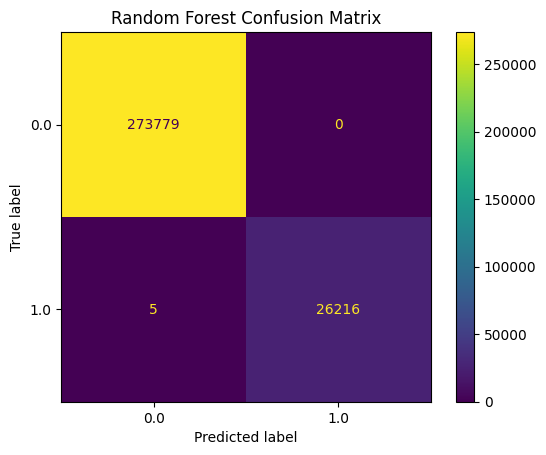

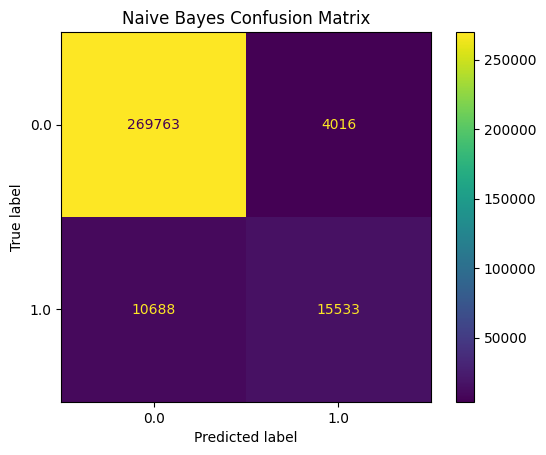

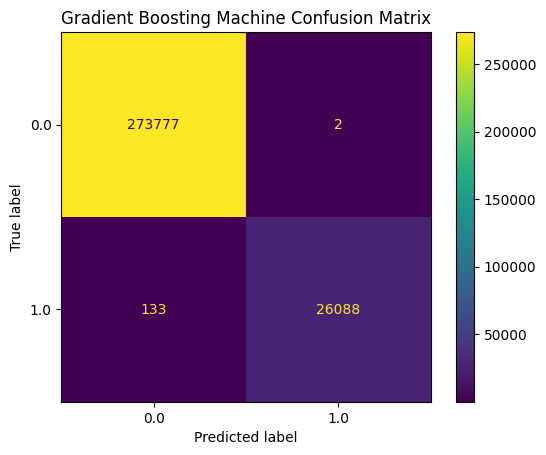

In [ ]:
# create confusion matrices
rf1_cm = confusion_matrix(y_test, rf1_y_pred)
nb1_cm = confusion_matrix(y_test, nb1_y_pred)
gbm1_cm = confusion_matrix(y_test, gbm1_y_pred)

# display confusion matrices
display_rf1_cm = ConfusionMatrixDisplay(confusion_matrix=rf1_cm, display_labels=rfModel1.classes_)
display_nb1_cm = ConfusionMatrixDisplay(confusion_matrix=nb1_cm, display_labels=nbModel1.classes_)
display_gbm1_cm = ConfusionMatrixDisplay(confusion_matrix=gbm1_cm, display_labels=gbmModel1.classes_)

# plot confusion matrices
display_rf1_cm.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

display_nb1_cm.plot()
plt.title('Naive Bayes Confusion Matrix')
plt.show()

display_gbm1_cm.plot()
plt.title('Gradient Boosting Machine Confusion Matrix')
plt.show()

#### ROC Curves

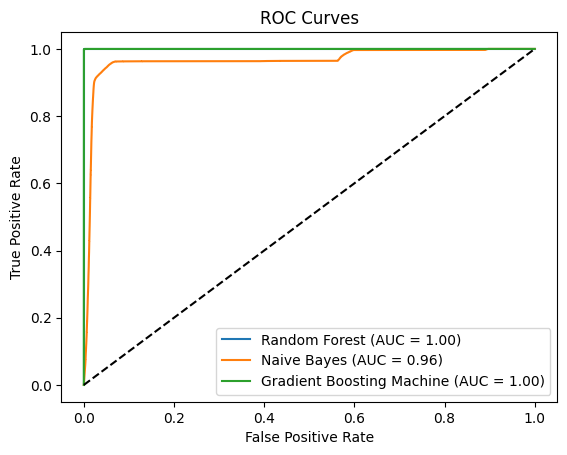

In [ ]:
# get predicted probabilities
rf1_probs = rfModel1.predict_proba(X_test)[:, 1]
nb1_probs = nbModel1.predict_proba(X_test)[:, 1]
gbm1_probs = gbmModel1.predict_proba(X_test)[:, 1]

# calculate ROC curves
rf1_fpr, rf1_tpr, _ = roc_curve(y_test, rf1_probs)
nb1_fpr, nb1_tpr, _ = roc_curve(y_test, nb1_probs)
gbm1_fpr, gbm1_tpr, _ = roc_curve(y_test, gbm1_probs)

# calculate AUCs
rf1_auc = auc(rf1_fpr, rf1_tpr)
nb1_auc = auc(nb1_fpr, nb1_tpr)
gbm1_auc = auc(gbm1_fpr, gbm1_tpr)

# plot ROC curves
plt.plot(rf1_fpr, rf1_tpr, label=f'Random Forest (AUC = {rf1_auc:.2f})')
plt.plot(nb1_fpr, nb1_tpr, label=f'Naive Bayes (AUC = {nb1_auc:.2f})')
plt.plot(gbm1_fpr, gbm1_tpr, label=f'Gradient Boosting Machine (AUC = {gbm1_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

## Conclusion